In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

# Import Dataset

In [60]:
df = pd.read_csv("dataset/loan_data.csv")

In [61]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [63]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [64]:
numerical_cols = ["person_age", "person_income", "person_emp_exp", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length", "credit_score"]

# Data Cleaning

## Bersihkan Data Duplikat

In [65]:
df.duplicated().sum()

np.int64(0)

## Bersihkan Nilai Null

In [66]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

## Handle Outlier


### Tindakan Terhadap Outlier

In [67]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


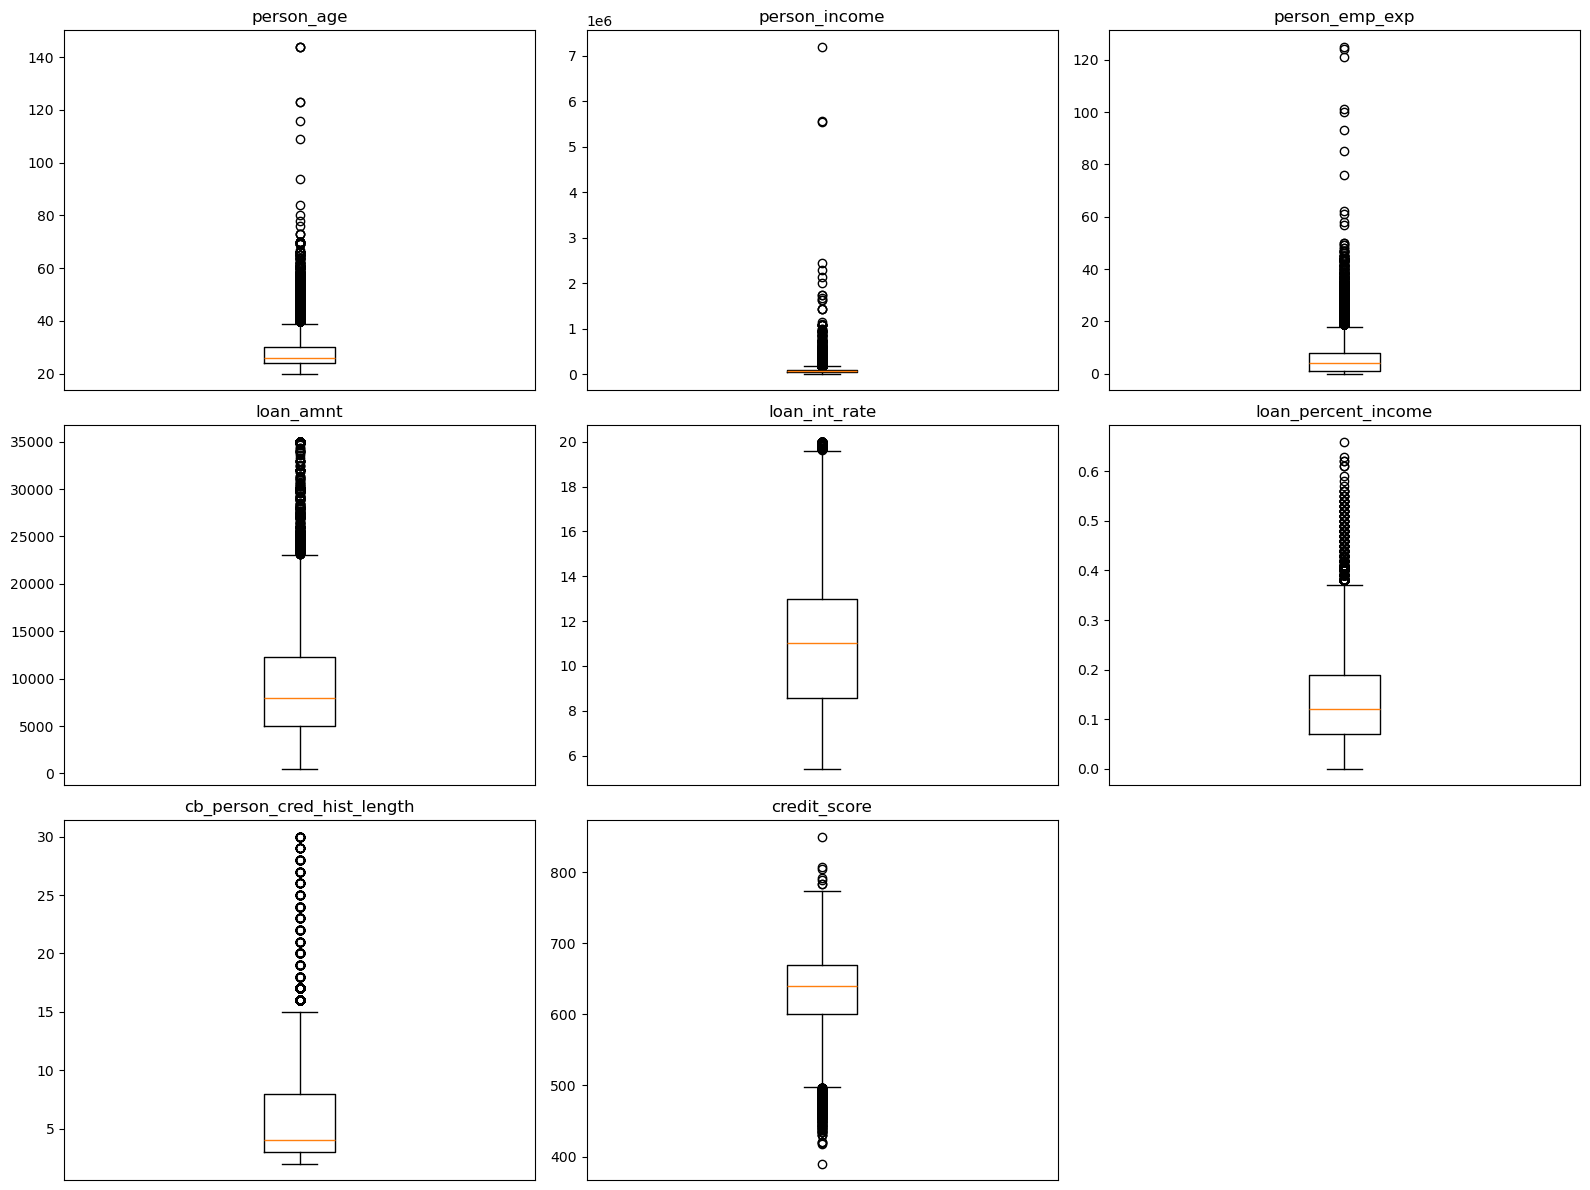

In [68]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[col].dropna())
    plt.title(col)
    plt.xticks([])

plt.tight_layout()
plt.show()

Setelah kami visualisaikan menggunakan boxplot, tampak jelas bahwa sebagian besar variabel numerik memiliki nilai yang menyimpang cukup jauh dari mayoritas data. Outlier tersebut muncul pada variabel usia, pendapatan, pengalaman kerja, jumlah pinjaman, hingga skor kredit. Meskipun penyimpangan tersebut dapat mencerminkan kondisi nyata pada sebagian individu, nilai ekstrem yang terlalu jauh dari distribusi utama berpotensi mengganggu proses analisis dan menurunkan kinerja model prediktif. Oleh karena itu, diperlukan langkah penanganan outlier yang tepat agar kualitas data tetap terjaga dan proses pemodelan dapat menghasilkan hasil yang lebih akurat serta dapat diandalkan.

In [69]:
df_clean = df.copy()

def iqr_capping(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(series, lower_bound, upper_bound)


for col in numerical_cols:
    df_clean[col] = iqr_capping(df_clean[col])


log_cols = ["person_income", "loan_amnt"]
for col in log_cols:
    min_val = df_clean[col].min()
    if min_val <= 0:
        df_clean[col] = df_clean[col] - min_val + 1
    df_clean[col] = np.log(df_clean[col])
print(df_clean.head())


   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master      11.183699             0.0   
1        21.0        female      High School       9.415890             0.0   
2        25.0        female      High School       9.428512             3.0   
3        23.0        female         Bachelor      11.286690             0.0   
4        24.0          male           Master      11.099453             1.0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT  10.047290    PERSONAL          16.02   
1                   OWN   6.907755   EDUCATION          11.14   
2              MORTGAGE   8.612503     MEDICAL          12.87   
3                  RENT  10.047290     MEDICAL          15.23   
4                  RENT  10.047290     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.37                         3.0         561.0  

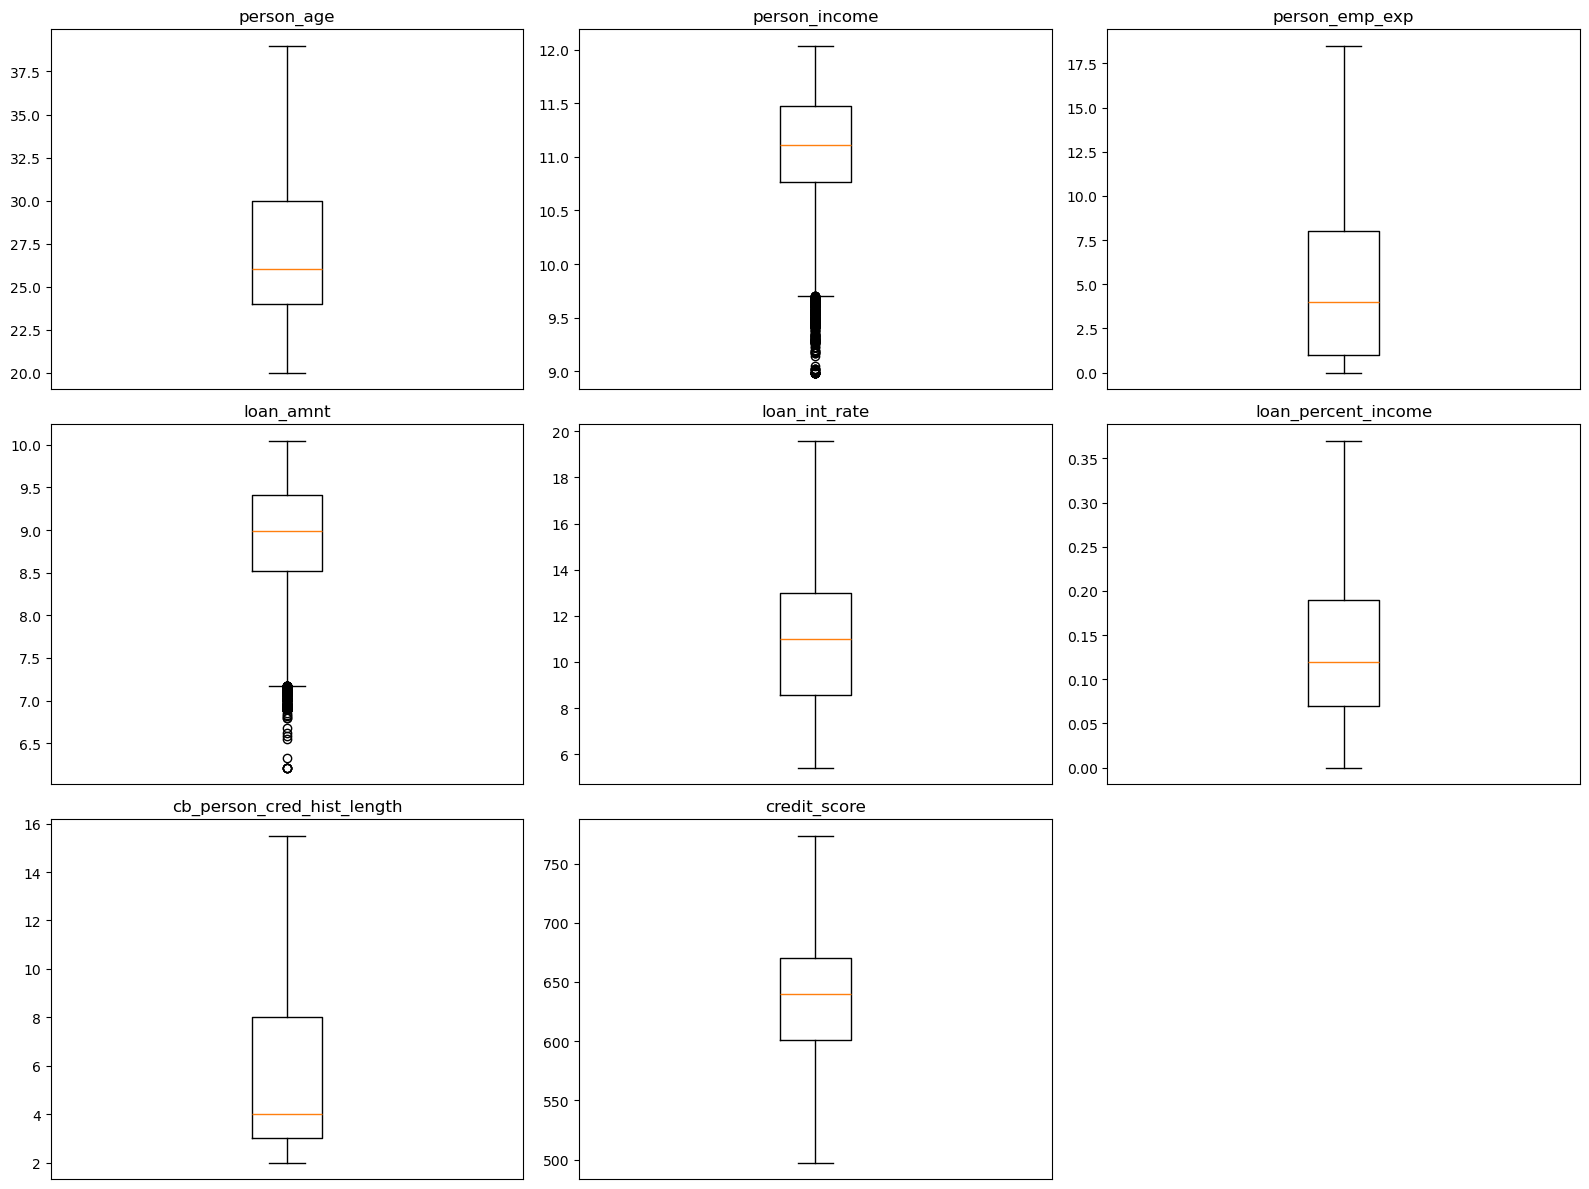

In [70]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df_clean[col].dropna())
    plt.title(col)
    plt.xticks([])

plt.tight_layout()
plt.show()

In [71]:
df_clean.shape

(45000, 14)

In [72]:
df_clean.to_csv('loan_data_clean.csv')

# Analisis Data Eksploratif

# Visualisasi Bivariat

## Hubungan Antara Pendapatan dan Jumlah Pinjaman

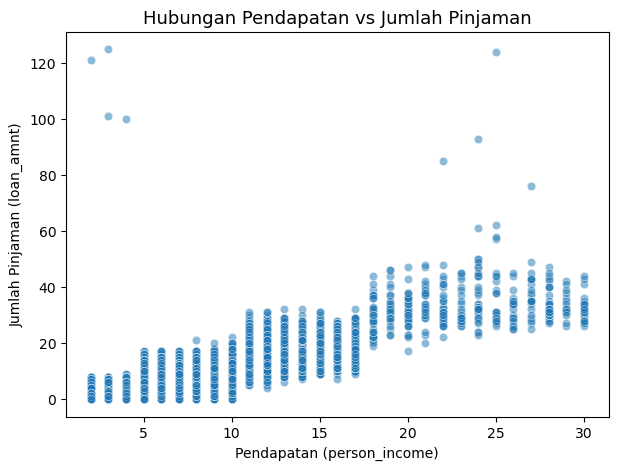

In [73]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='cb_person_cred_hist_length', y='person_emp_exp', alpha=0.5)
plt.title('Hubungan Pendapatan vs Jumlah Pinjaman', fontsize=13)
plt.xlabel('Pendapatan (person_income)')
plt.ylabel('Jumlah Pinjaman (loan_amnt)')
plt.show()

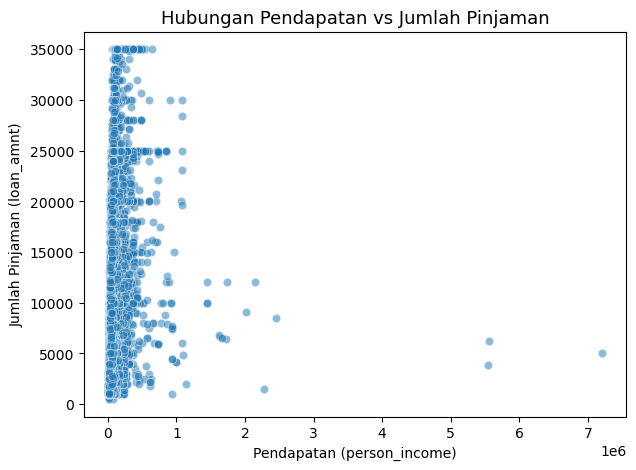

In [74]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='person_income', y='loan_amnt', alpha=0.5)
plt.title('Hubungan Pendapatan vs Jumlah Pinjaman', fontsize=13)
plt.xlabel('Pendapatan (person_income)')
plt.ylabel('Jumlah Pinjaman (loan_amnt)')
plt.show()

Hubungan antara pendapatan dan jumlah pinjaman tidak menunjukkan pola yang jelas atau teratur, menurut persebaran titik pada grafik.  Meskipun sebagian besar peminjam berasal dari kelompok dengan pendapatan rendah, jumlah pinjaman yang mereka terima bervariasi dari yang sangat kecil hingga yang sangat besar.  Hal ini menunjukkan bahwa individu dengan pendapatan tinggi jumlahnya lebih sedikit dalam data ini dan tidak menunjukkan kecenderungan yang lebih tinggi untuk meminjam dibandingkan dengan kelompok dengan pendapatan rendah. Ini menunjukkan bahwa kebutuhan dan keputusan untuk meminjam tidak sepenuhnya ditentukan oleh besaran pendapatan, tetapi mungkin dipengaruhi oleh faktor lain seperti kondisi finansial pribadi, kebutuhan mendesak, dan kemampuan untuk mengakses layanan kredit.  Dengan demikian, dapat dikatakan bahwa ada kecenderungan yang lemah untuk korelasi antara pendapatan dan jumlah pinjaman.

## Hubungan Antara Jumlah Pinjaman dan Persentase Pinjaman terhadap Pendapatan

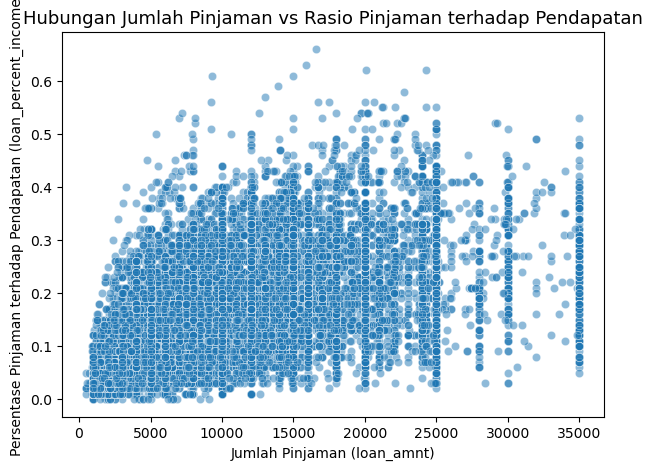

In [75]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='loan_amnt', y='loan_percent_income', alpha=0.5)
plt.title('Hubungan Jumlah Pinjaman vs Rasio Pinjaman terhadap Pendapatan', fontsize=13)
plt.xlabel('Jumlah Pinjaman (loan_amnt)')
plt.ylabel('Persentase Pinjaman terhadap Pendapatan (loan_percent_income)')
plt.show()

Dari grafik ini, kami bisa melihat dan menyimpulkan bahwa semakin banyak pinjaman yang diambil seseorang, persentase pinjaman terhadap pendapatannya biasanya juga cenderung meningkat. Namun, penyebarannya tetap sangat beragam.  Menurut titik data yang tersebar luas, ada individu yang meminjam sejumlah besar uang tetapi hanya menghabiskan sebagian kecil dari pendapatannya, sementara ada individu lain yang meminjam sejumlah kecil uang tetapi tetap merasa berat karena pendapatannya yang rendah.  Pola ini menunjukkan bahwa kemampuan seseorang untuk menanggung pinjaman bergantung pada kedua nominal pinjaman dan pendapatannya.  Dengan kata lain, mereka yang berpenghasilan rendah memiliki rasio pinjaman terhadap pendapatan yang lebih tinggi, sehingga beban pinjaman mereka lebih besar.

## Hubungan Antara Usia dan Panjang Riwayat Kredit

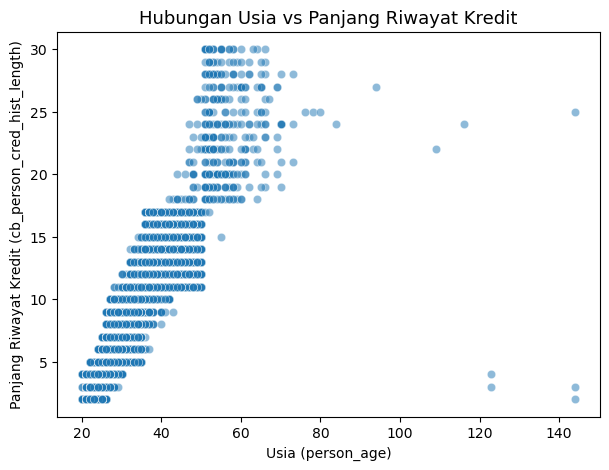

In [76]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='person_age', y='cb_person_cred_hist_length', alpha=0.5)
plt.title('Hubungan Usia vs Panjang Riwayat Kredit', fontsize=13)
plt.xlabel('Usia (person_age)')
plt.ylabel('Panjang Riwayat Kredit (cb_person_cred_hist_length)')
plt.show()

Grafik ini menunjukkan kecenderungan bahwa jangka waktu kredit seseorang cenderung meningkat seiring bertambahnya usia mereka. Namun, ini tidak selalu benar dan ada variasi.  Mereka yang lebih muda biasanya memiliki riwayat kredit yang lebih pendek, mungkin karena mereka baru mulai bekerja atau memiliki kebutuhan keuangan yang memerlukan pinjaman. Sebaliknya, mereka yang sedikit lebih tua memiliki riwayat kredit yang lebih panjang dan stabil, yang menunjukkan bahwa mereka telah menggunakan layanan keuangan formal untuk waktu yang lebih lama untuk mendapatkan kredit.  Meskipun demikian, ada beberapa kesalahan, seperti orang yang lebih tua dengan riwayat kredit yang pendek. Ini bisa terjadi karena mereka baru menggunakan kredit belakangan atau menutup riwayat kredit sebelumnya. Secara keseluruhan, grafik ini memberi kesan bahwa riwayat kredit berkembang seiring pengalaman finansial, bukan sekadar faktor usia saja.

## Hubungan Antara Skor Kredit dan Tingkat Bunga Pinjaman

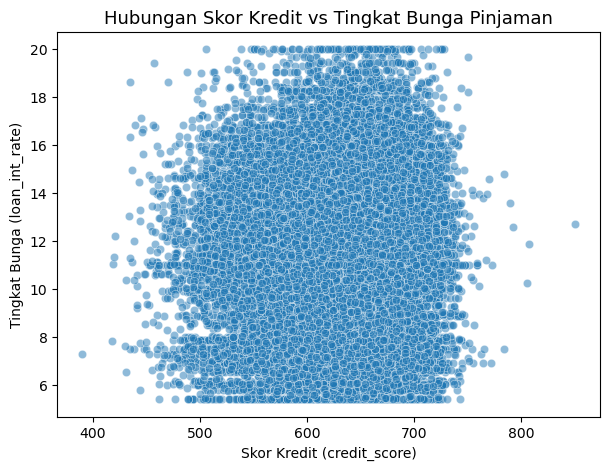

In [77]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='credit_score', y='loan_int_rate', alpha=0.5)
plt.title('Hubungan Skor Kredit vs Tingkat Bunga Pinjaman', fontsize=13)
plt.xlabel('Skor Kredit (credit_score)')
plt.ylabel('Tingkat Bunga (loan_int_rate)')
plt.show()

Grafik ini menunjukkan hubungan antara skor kredit dan tingkat bunga pinjaman yang tidak jelas.  Orang dengan skor kredit tinggi tidak selalu mendapatkan bunga yang lebih rendah, begitu pula orang dengan skor kredit rendah tidak selalu mendapatkan bunga yang tinggi.  Sebaran titik yang sangat rata di hampir semua nilai menunjukkan bahwa penentu tingkat bunga tidak hanya bergantung pada skor kredit.  Lembaga pemberi pinjaman mungkin mempertimbangkan faktor tambahan seperti jenis pinjaman, peraturan institusi, jaminan, atau profil risiko yang lebih rumit.  Meskipun skor kredit yang baik secara teoritis seharusnya memungkinkan bunga yang lebih rendah, data ini menunjukkan bahwa kenyataannya jauh lebih beragam dan sulit.

## Hubungan Antara Skor Kredit dan Status Pinjaman

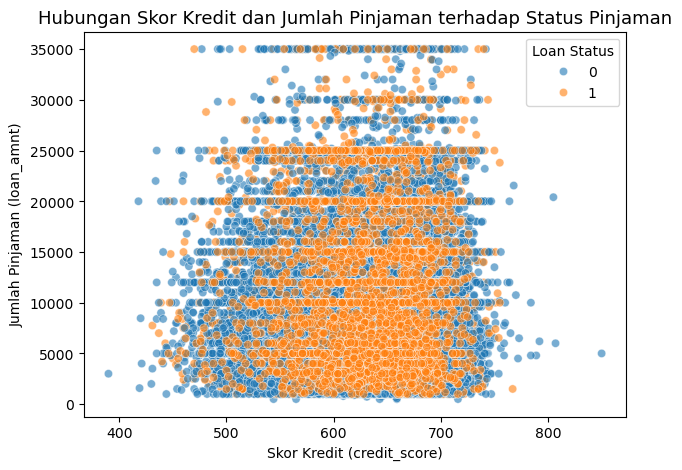

In [78]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='credit_score', y='loan_amnt', hue='loan_status', alpha=0.6)
plt.title('Hubungan Skor Kredit dan Jumlah Pinjaman terhadap Status Pinjaman', fontsize=13)
plt.xlabel('Skor Kredit (credit_score)')
plt.ylabel('Jumlah Pinjaman (loan_amnt)')
plt.legend(title='Loan Status')
plt.show()

Dari scatter plot ini, skor kredit dan jumlah pinjaman tidak menunjukkan perbedaan yang signifikan antara peminjam yang lancar (status 1) dan yang gagal bayar (status 0).  Titik biru dan oranye hampir sama di semua rentang nilai, dari pinjaman kecil hingga pinjaman besar.  Artinya, orang dengan skor kredit tinggi juga dapat gagal membayar, dan orang dengan skor kredit rendah tidak selalu mengalami masalah.  Meskipun skor kredit dan jumlah pinjaman secara teori penting, data ini tidak memiliki korelasi yang kuat dan tidak dapat digunakan sebagai patokan tunggal untuk menilai kelayakan pinjaman. Ada kemungkinan bahwa faktor lain yang lebih penting, seperti pendapatan, stabilitas kerja, atau rasio utang, berperan di luar pandangan publik.

# Visualisasi Distribusi

## Distribusi Usia Peminjam

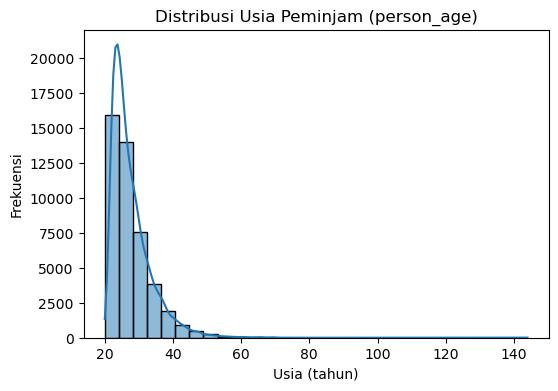

In [79]:
plt.figure(figsize=(6,4))
sns.histplot(df['person_age'], kde=True, bins=30)
plt.title("Distribusi Usia Peminjam (person_age)")
plt.xlabel("Usia (tahun)")
plt.ylabel("Frekuensi")
plt.show()

## Distribusi Pendapatan Peminjam

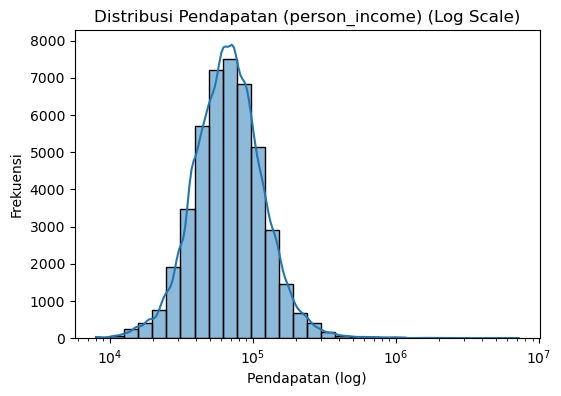

In [80]:
plt.figure(figsize=(6,4))
sns.histplot(df['person_income'], kde=True, bins=30, log_scale=True)
plt.title("Distribusi Pendapatan (person_income) (Log Scale)")
plt.xlabel("Pendapatan (log)")
plt.ylabel("Frekuensi")
plt.show()

## Distribusi Jumlah Pinjaman

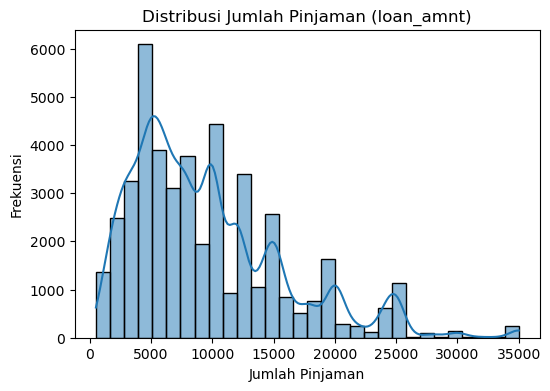

In [81]:
plt.figure(figsize=(6,4))
sns.histplot(df['loan_amnt'], kde=True, bins=30)
plt.title("Distribusi Jumlah Pinjaman (loan_amnt)")
plt.xlabel("Jumlah Pinjaman")
plt.ylabel("Frekuensi")
plt.show()

## Distribusi Suku Bunga Pinjaman

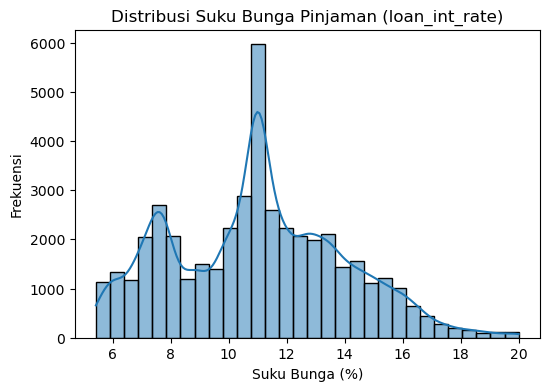

In [82]:
plt.figure(figsize=(6,4))
sns.histplot(df['loan_int_rate'], kde=True, bins=30)
plt.title("Distribusi Suku Bunga Pinjaman (loan_int_rate)")
plt.xlabel("Suku Bunga (%)")
plt.ylabel("Frekuensi")
plt.show()

## Distribusi Rasio Pinjaman terhadap Pendapatan

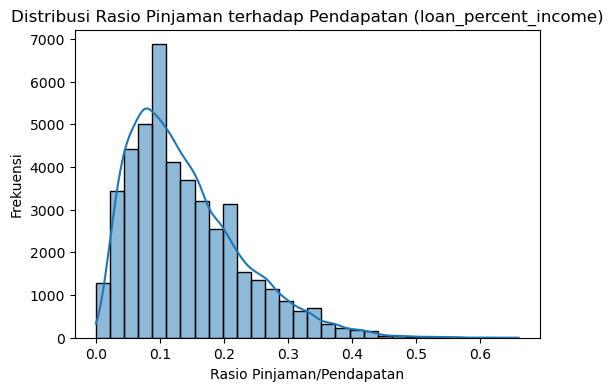

In [83]:
plt.figure(figsize=(6,4))
sns.histplot(df['loan_percent_income'], kde=True, bins=30)
plt.title("Distribusi Rasio Pinjaman terhadap Pendapatan (loan_percent_income)")
plt.xlabel("Rasio Pinjaman/Pendapatan")
plt.ylabel("Frekuensi")
plt.show()

## Distribusi Lama Riwayat Kredit

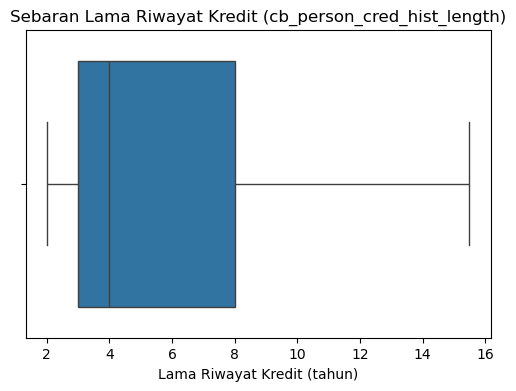

In [84]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean['cb_person_cred_hist_length'])
plt.title("Sebaran Lama Riwayat Kredit (cb_person_cred_hist_length)")
plt.xlabel("Lama Riwayat Kredit (tahun)")
plt.show()

# Korelasi Variabel

## Analisis Korelasi Variabel Kontinu dengan Pearson

In [85]:
continu_corr = df[numerical_cols].corr(method='pearson')
continu_corr

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000


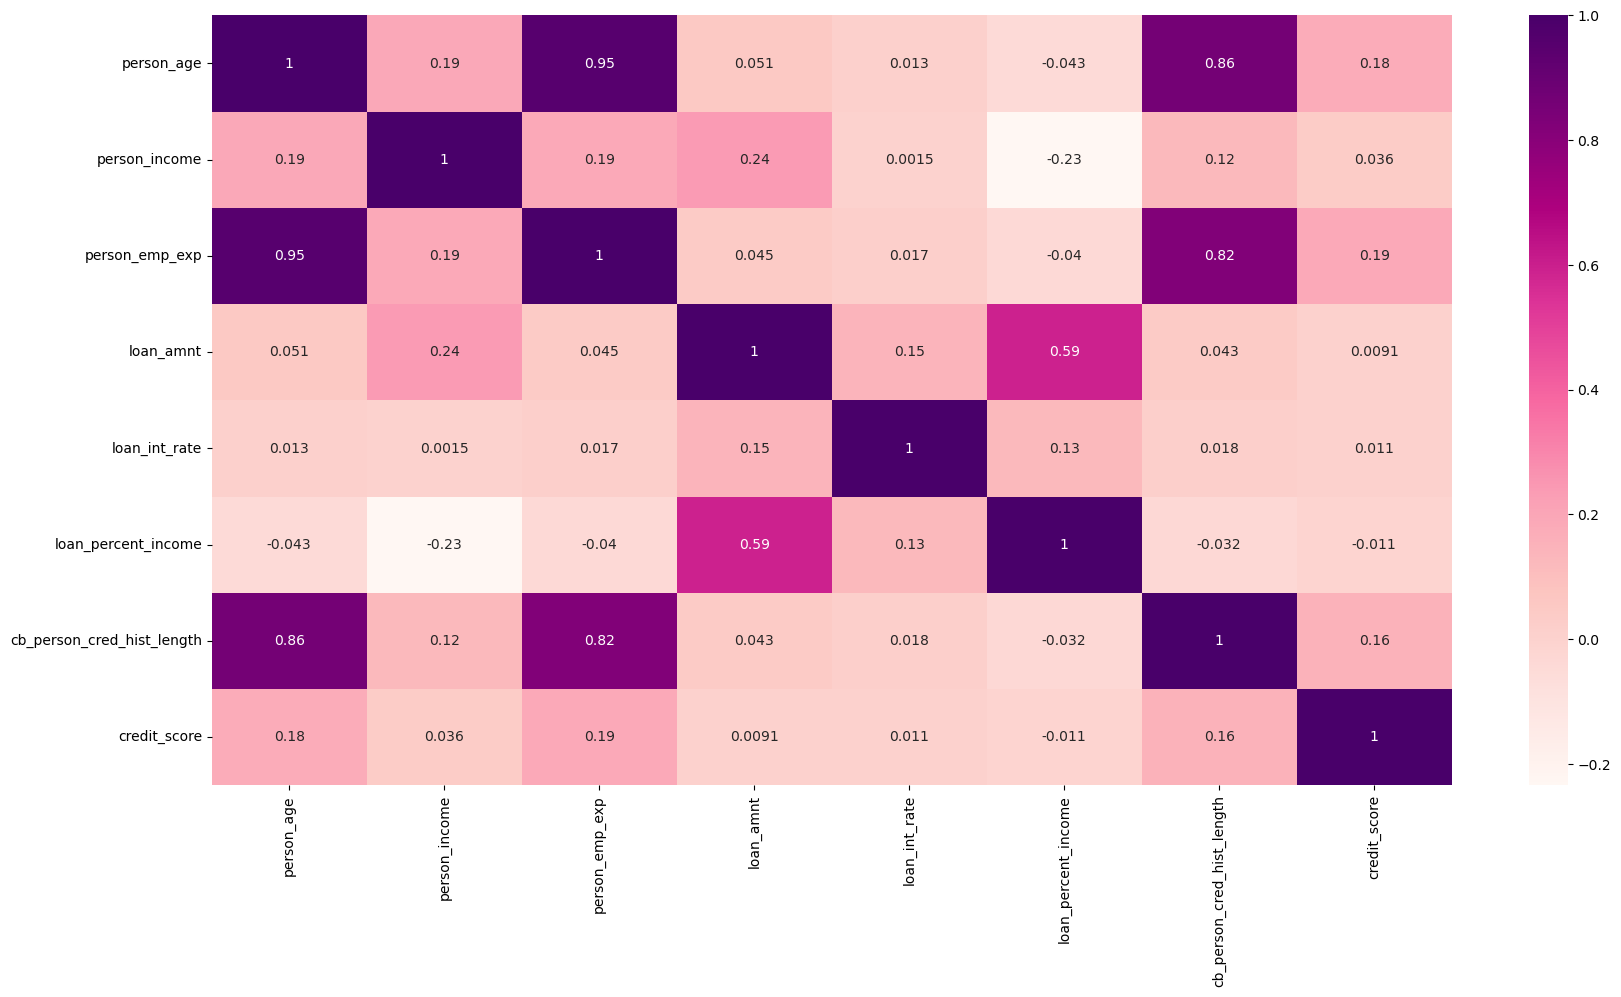

In [86]:
plt.figure(figsize=(20, 10))
sns.heatmap(continu_corr, annot=True, cmap='RdPu')
plt.show()

# Data Transform

## Label Encoding

In [87]:
df_encoded = df_clean.copy()

In [88]:
label_col = 'previous_loan_defaults_on_file'
le = LabelEncoder()
df_encoded[label_col] = le.fit_transform(df_encoded[label_col])

## One Hot Encoding

In [89]:
ohe_cols = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent'
]

df_encoded = pd.get_dummies(df_encoded, columns=ohe_cols, drop_first=True, dtype=int)

In [90]:
df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,11.183699,0.0,10.047290,16.02,0.37,3.0,561.0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,21.0,9.415890,0.0,6.907755,11.14,0.08,2.0,504.0,1,0,...,1,0,0,1,0,1,0,0,0,0
2,25.0,9.428512,3.0,8.612503,12.87,0.37,3.0,635.0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,23.0,11.286690,0.0,10.047290,15.23,0.37,2.0,675.0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,24.0,11.099453,1.0,10.047290,14.27,0.37,4.0,586.0,0,1,...,0,1,0,0,1,0,0,1,0,0


# Classification Model

## Features Engineering

In [91]:
X = df_encoded.drop("loan_status", axis=1)
y = df_encoded["loan_status"]

## Splitting Data

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Standarisasi Data

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [94]:
# Regresi Logistik
model_regresilogistik = LogisticRegression(max_iter=1000, random_state=42)
model_regresilogistik.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [95]:
y_pred = model_regresilogistik.predict(X_test_scaled)

In [96]:
print("Classification Report", classification_report(y_test, y_pred))

Classification Report               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7000
           1       0.79      0.77      0.78      2000

    accuracy                           0.90      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.90      0.90      0.90      9000



# Regresi Linear Berganda

In [97]:
X = df_encoded.drop("credit_score", axis=1)
y = df_encoded["credit_score"]

In [98]:
X_constant = sm.add_constant(np.array(X))

## OLS

In [99]:
model_regresilinear = sm.OLS(y, X_constant).fit()
print(model_regresilinear.summary())

                            OLS Regression Results                            
Dep. Variable:           credit_score   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     277.3
Date:                Wed, 05 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:56:31   Log-Likelihood:            -2.3685e+05
No. Observations:               45000   AIC:                         4.737e+05
Df Residuals:                   44977   BIC:                         4.739e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        632.7267      6.924     91.384      0.0

In [100]:
residuals = model_regresilinear.resid

## Uji Normalitas

In [101]:
stat, p_value = shapiro(residuals)
print(f"Uji Normalitas Shapiro-Wilk: Statistik={stat:.4f}, p-value={p_value:.4f}")
if p_value > 0.05:
    print("Residual terdistribusi normal")
else:
    print("Residual tidak normal")

Uji Normalitas Shapiro-Wilk: Statistik=0.9742, p-value=0.0000
Residual tidak normal


c:\Users\zaldi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45000.
  res = hypotest_fun_out(*samples, **kwds)


## Uji Multikolinearitas

In [102]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["1/VIF"] = 1 / vif_data["VIF"]
print("\nVIF:\n", vif_data)


VIF:
                            feature          VIF     1/VIF
0                       person_age   289.019190  0.003460
1                    person_income  1146.677421  0.000872
2                   person_emp_exp    14.496759  0.068981
3                        loan_amnt  1032.579789  0.000968
4                    loan_int_rate    16.796918  0.059535
5              loan_percent_income    21.660270  0.046167
6       cb_person_cred_hist_length    15.045881  0.066463
7   previous_loan_defaults_on_file     2.887429  0.346329
8                      loan_status     2.412778  0.414460
9               person_gender_male     2.231726  0.448084
10       person_education_Bachelor     2.120678  0.471547
11      person_education_Doctorate     1.064524  0.939387
12    person_education_High School     1.992818  0.501802
13         person_education_Master     1.582617  0.631865
14     person_home_ownership_OTHER     1.007929  0.992133
15       person_home_ownership_OWN     1.206920  0.828555
16     

## Uji Heteroskedastisitas

In [103]:
bp_test = het_breuschpagan(residuals, X_constant)
labels = ['LM Stat', 'LM p-value', 'F-stat', 'F p-value']
bp_result = dict(zip(labels, bp_test))
print("\nUji Breusch-Pagan:", bp_result)
if bp_result['F p-value'] > 0.05:
    print("Tidak ada heteroskedastisitas")
else:
    print("Ada heteroskedastisitas")


Uji Breusch-Pagan: {'LM Stat': np.float64(783.9030241870604), 'LM p-value': np.float64(1.4500268182181913e-151), 'F-stat': np.float64(36.24513646954914), 'F p-value': np.float64(5.593786795326279e-153)}
Ada heteroskedastisitas


## Uji Autokorelasi

In [104]:
dw_stat = sm.stats.stattools.durbin_watson(residuals)
print(f"\nDurbin-Watson: {dw_stat:.3f}")


Durbin-Watson: 2.010
